<a href="https://colab.research.google.com/github/techsidh/laptop_price_prediction_scrach/blob/main/laptop_price_prediction_scrach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup 
import requests

import warnings

In [58]:
final = pd.DataFrame()
for i in range(1,46):
  url = requests.get("https://www.flipkart.com/laptops/pr?sid=6bo%2Cb5g&otracker=categorytree&fm=neo%2Fmerchandising&iid=M_9443bafe-782b-470d-8df7-6de36e9e00c5_1_372UD5BXDFYS_MC.34WHNYFH5V2Y&otracker=hp_rich_navigation_8_1.navigationCard.RICH_NAVIGATION_Electronics%7ELaptop%2Band%2BDesktop_34WHNYFH5V2Y&otracker1=hp_rich_navigation_PINNED_neo%2Fmerchandising_NA_NAV_EXPANDABLE_navigationCard_cc_8_L1_view-all&cid=34WHNYFH5V2Y&page={}".format(i)).text
  soup = BeautifulSoup(url)

  product = []
  price = []
  rating = []


  for i in soup.findAll('a',href = True, attrs = {'class':'_1fQZEK'}):
    name = i.find('div',attrs={'class':'_4rR01T'})
    rate = i.find('div',attrs = {'class':'_30jeq3 _1_WHN1'})
    stars= i.find('div',attrs = {'class':'_3LWZlK'})
    

    product.append(name.text)
    price.append(rate.text)
    rating.append(stars)
    
  df = pd.DataFrame({'Product_name':product,
                     'Price':price,
                     'Rating':rating
                     })
  final = final.append(df,ignore_index = True);


<ipython-input-58-c9779a186e99>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final = final.append(df,ignore_index = True);
<ipython-input-58-c9779a186e99>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final = final.append(df,ignore_index = True);
<ipython-input-58-c9779a186e99>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final = final.append(df,ignore_index = True);
<ipython-input-58-c9779a186e99>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final = final.append(df,ignore_index = True);
<ipython-input-58-c9779a186e99>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

In [59]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product_name  407 non-null    object
 1   Price         407 non-null    object
 2   Rating        335 non-null    object
dtypes: object(3)
memory usage: 9.7+ KB


In [60]:
final.head()

,Product_name,Price,Rating
0,Primebook 4G Android Based MediaTek MT8788 - (...,"₹16,990","[4.1, []]"
1,Primebook 4G Android Based MediaTek MT8788 - (...,"₹18,990","[4, []]"
2,ASUS Vivobook 15 Core i3 11th Gen - (8 GB/512 ...,"₹34,990","[4.3, []]"
3,ASUS Vivobook 15 Core i5 11th Gen - (8 GB/512 ...,"₹42,990","[4.2, []]"
4,realme Book (Slim) Core i3 11th Gen - (8 GB/25...,"₹32,364","[4.4, []]"


In [61]:
final['Product_name'][111]

'Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA...'

In [62]:
product_names = final['Product_name']
# Extracting the first two words from each product name
final['Company'] = product_names.apply(lambda x:' '.join(x.split()[:1]))

In [63]:
ram = []

window = []
for i in final['Product_name']:
#ram
  a = i.find("GB")
  a_val = i[:a]
  ram.append(a_val)

#ssd

final['RAM'] = ram

In [64]:
final['RAM'] = final['RAM'].str.split().str[-1]
final['RAM'] = final['RAM'].apply(lambda x:x.lstrip('('))

In [65]:
final['RAM']

0      4
1      4
2      8
3      8
4      8
      ..
402    8
403    8
404    4
405    8
406    8
Name: RAM, Length: 407, dtype: object

In [66]:
final['Rating'][1]

<div class="_3LWZlK">4</div>

In [67]:
final["Rating"] = final["Rating"].astype(str)
final['Rating'] = final['Rating'].apply(lambda x : x.rstrip('<img class="_1wB99o" src="data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHdpZHRoPSIxMyIgaGVpZ2h0PSIxMiI+PHBhdGggZmlsbD0iI0ZGRiIgZD0iTTYuNSA5LjQzOWwtMy42NzQgMi4yMy45NC00LjI2LTMuMjEtMi44ODMgNC4yNTQtLjQwNEw2LjUuMTEybDEuNjkgNC4wMSA0LjI1NC40MDQtMy4yMSAyLjg4Mi45NCA0LjI2eiIvPjwvc3ZnPg=="/>').lstrip('<div class="_3LWZlK">'))

In [68]:
final.drop(['Product_name'],axis = 1,inplace = True)

In [78]:
final['Price'] = final['Price'].str.replace('₹','')
final['Price'] = final['Price'].str.replace(',','')

final['Price'] = final['Price'].astype(int)

In [80]:
final.sample(5)

,Price,Rating,Company,RAM
6,41990,4.,HP,8
109,52990,4.8,ASUS,8
105,35990,4.,ASUS,8
34,42990,4.,MSI,8
294,41990,,DELL,8


In [79]:
final.to_csv('laptop_price.csv',index = False)

In [184]:
df = pd.read_csv("/content/laptop_price.csv")

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Price    407 non-null    int64 
 1   Rating   275 non-null    object
 2   Company  407 non-null    object
 3   RAM      407 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 12.8+ KB


In [186]:
df

,Price,Rating,Company,RAM
0,16990,4.,Primebook,4
1,18990,NaN,Primebook,4
2,34990,4.,ASUS,8
3,42990,4.,ASUS,8
4,32364,4.,realme,8
...,...,...,...,...
402,58020,NaN,HP,8
403,39990,NaN,Lenovo,8
404,51999,NaN,DELL,4
405,35990,"2lA32"">2.7",ASUS,8


<Axes: >

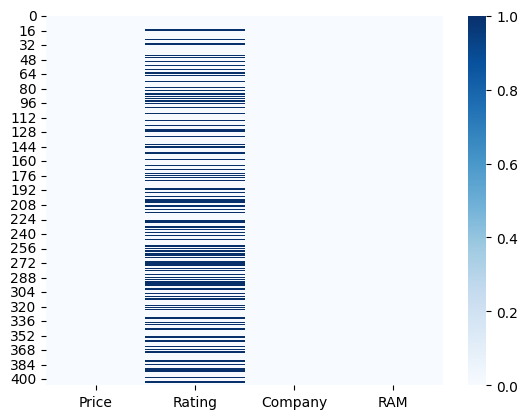

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isna(),cmap = "Blues")

In [188]:
df['Rating'] = df['Rating'].replace(np.nan,0)
df['Rating'] = df['Rating'].replace('.',0)


In [189]:
df['Rating'] = df['Rating'].astype(str)
df['Rating'] = df['Rating'].apply(lambda x:x.rstrip('.').lstrip('.'))


In [190]:
df.Rating.value_counts()

4             243
0             145
8               7
4.8             4
7               4
4.7             2
2lA32">2        1
2lA32">2.7      1
Name: Rating, dtype: int64

In [191]:
df[df['Rating'] == '2lA32">2.7']

,Price,Rating,Company,RAM
405,35990,"2lA32"">2.7",ASUS,8


In [203]:
df.replace({'Rating':{'2lA32">2.7':'2.7','2lA32">2':'2'}},inplace = True)
df['Rating'] = df['Rating'].astype(float)

In [193]:
df.sample(5)

,Price,Rating,Company,RAM
83,61990,4,ASUS,16
199,18990,0,Primebook,4
265,44990,4,DELL,8
122,55990,4,DELL,8
132,41890,8,DELL,8


<Axes: >

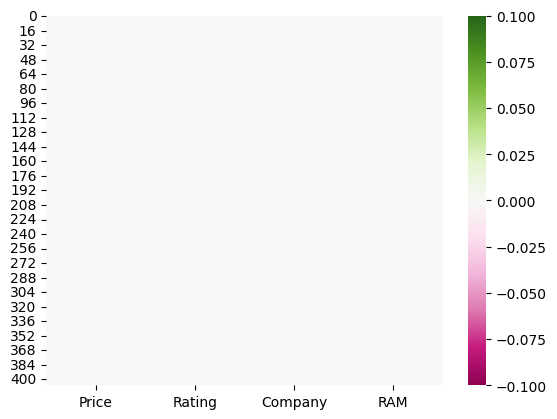

In [194]:
sns.heatmap(df.isna(),cmap = "PiYG")

<Axes: ylabel='RAM'>

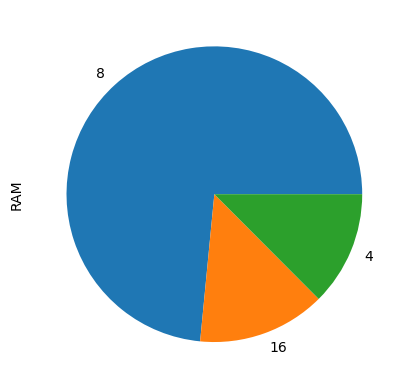

In [195]:
(df['RAM'].value_counts(normalize = True)*100).plot(kind = 'pie')

In [196]:
df['Company'].replace('Primebook','MediaTek',inplace = True)

<Axes: >

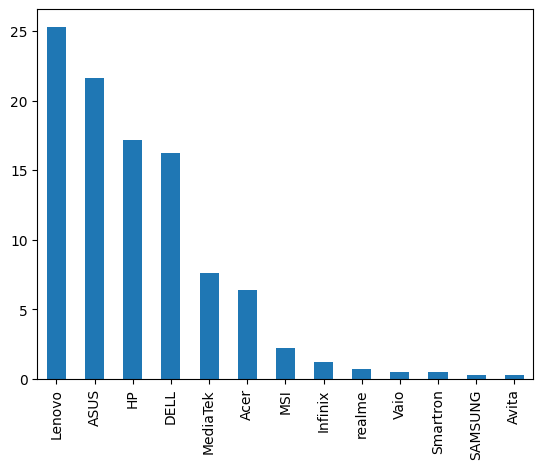

In [197]:
(df['Company'].value_counts(normalize = True)*100).plot(kind = 'bar')

Text(0, 0.5, 'Price of Laptop')

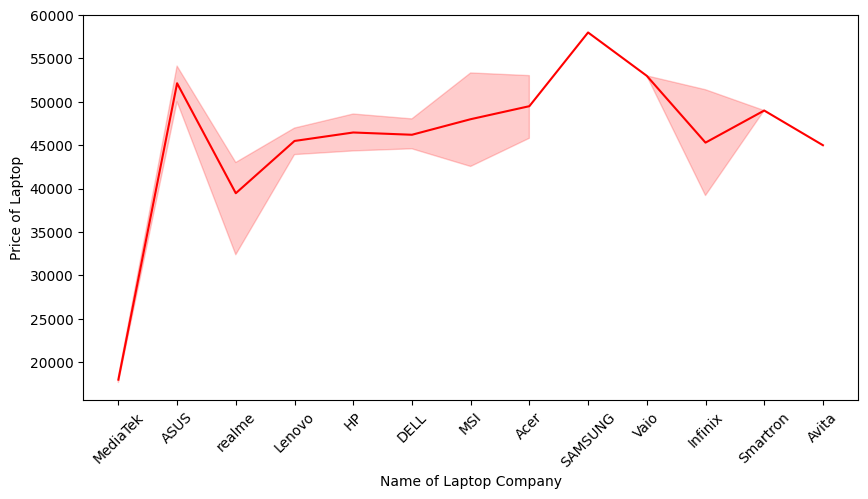

In [198]:
#lets see price of product vary based on company
plt.figure(figsize = (10,5))
sns.lineplot(x = df.Company,y = df.Price,color='red')
plt.xlabel('Name of Laptop Company')
plt.xticks(rotation = 45)
plt.ylabel('Price of Laptop')

Text(0, 0.5, 'Price of Laptop')

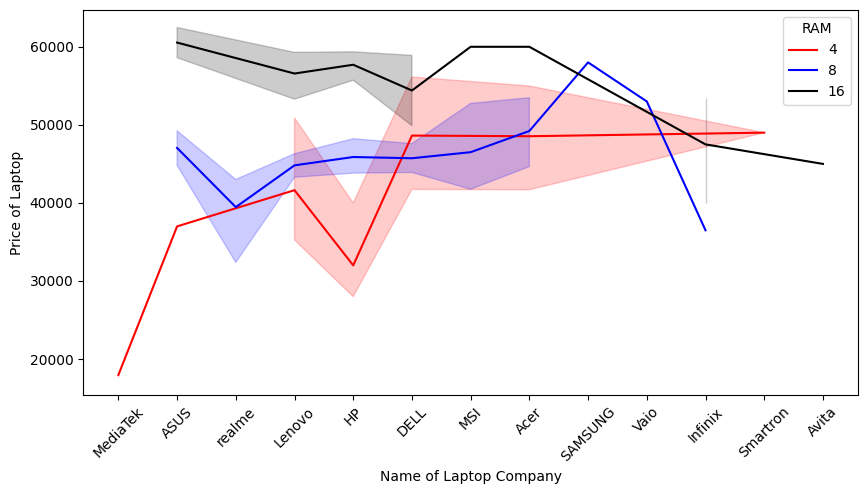

In [199]:
#lets see price of product vary based on company and RAM
plt.figure(figsize = (10,5))
sns.lineplot(x = df.Company,y = df.Price,hue = df.RAM,palette=['red','blue','black'])
plt.xlabel('Name of Laptop Company')
plt.xticks(rotation = 45)
plt.ylabel('Price of Laptop')

<Axes: xlabel='Company', ylabel='Rating'>

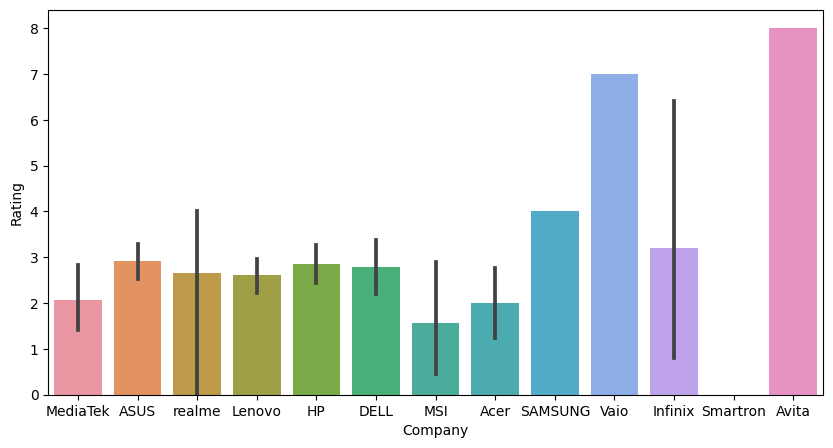

In [205]:
#least and high rate company

plt.figure(figsize = (10,5))
sns.barplot(x = df.Company,y = df.Rating)